In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
raw = pd.DataFrame.from_csv('data_n2.tsv', sep='\t')
raw = raw.drop('probability_ordered', axis=1) # we ignore col 'probability_ordered

In [3]:
raw.head(5)

,target_article_id,target_article_name,probability,target_position_in_text,target_position_in_section,target_in_table,target_position_in_text_normed,target_position_in_section_normed,source_article_max_section_number,source_article_max_number_of_links
source_article_id,,,,,,,,,,
27275061,1946322,Katipo,0.705357,8,8,0.0,0.195122,0.727273,6,41
27275061,1946322,Latrodectus katipo,0.294643,29,14,0.0,0.707317,0.608696,6,41
18328851,16562095,Sino Land Company Limited,0.575000,14,14,0.0,0.736842,0.875000,3,19
18328851,20477410,Sino Hotels (Holdings) Limited,0.545455,15,15,0.0,0.789474,0.937500,3,19
18328851,16562095,Sino Land,0.425000,18,2,0.0,0.947368,0.666667,3,19


In [4]:
samples, feats = raw.shape
print("num of samples: {}, num of features: {}".format(samples, feats-1))

num of samples: 205278, num of features: 9


Let's have a look at the features

,features,correlation
0,target_article_id,6.564554e-17
2,target_position_in_text,-1.002721e-01
3,target_position_in_section,-4.167372e-02
4,target_in_table,-1.321881e-01
5,target_position_in_text_normed,-1.948319e-01
6,target_position_in_section_normed,5.278587e-02
7,source_article_max_section_number,6.054259e-17
8,source_article_max_number_of_links,1.843562e-17


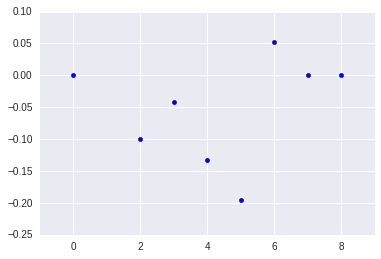

In [18]:
corr_matrix = raw.corr() # correlation matrix between all cols

corr_target = corr_matrix.probability.to_frame().reset_index()
corr_target.columns = ['features', 'correlation']
# drop the row for the correlation of probability with itself
corr_target = corr_target[corr_target.features != 'probability'] 
plt.scatter(corr_target.index, corr_target.correlation)
corr_target

So with the text feature dropped, we only have 8 features left, and out of those 3 show a 0 correlation value with the target. 

Of these three, the `target_article_id` makes sense, since it will be different for each target link, and point to at least two different probability values. The different IDs have no ordered relation between themselves.

On the other hand, the virtually zero correlation values for `source_article_max_section_number` and `source_article_max_number_of_links` is surprising. By themselves, these features tell us nothing about the target data.

The most informative feature is `target_position_in_text_normed` at close to $-0.20$ correlation. This seems reasonable, as one might assume users tend to click on earlier links rather than later ones.